# Nino calculations

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot

jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
import xarray as xr
from src.plot_utils import ps_defaults

ps_defaults(use_tex=False, dpi=150)

In [61]:
from src.metrics import get_nino_trend
from src.constants import TEST_DIREC, SEL_DICT

In [4]:
import matplotlib.pyplot as plt
from src.plot_utils import get_dim, label_subplots

In [66]:
from typing import Tuple

def plot_nino():
    def get_points(reg_dict: dict) -> Tuple[list]:
        x, y = [], []
        x.append(reg_dict["X"][0])
        y.append(reg_dict["Y"][0])
        x.append(reg_dict["X"][0])
        y.append(reg_dict["Y"][1])
        x.append(reg_dict["X"][1])
        y.append(reg_dict["Y"][1])
        x.append(reg_dict["X"][1])
        y.append(reg_dict["Y"][0])
        x.append(reg_dict["X"][0])
        y.append(reg_dict["Y"][0])
        return x, y

    for reg in reversed(sorted(SEL_DICT)):

        x, y = get_points(SEL_DICT[reg])
        if reg == "nino3.4":
            plt.fill(x, y, label=reg, alpha=0.5, linewidth=1, color=SEL_DICT[reg]["color"])
        else:
            plt.plot(x, y, label=reg, alpha=0.5, linewidth=1, color=SEL_DICT[reg]["color"])

    plt.legend()

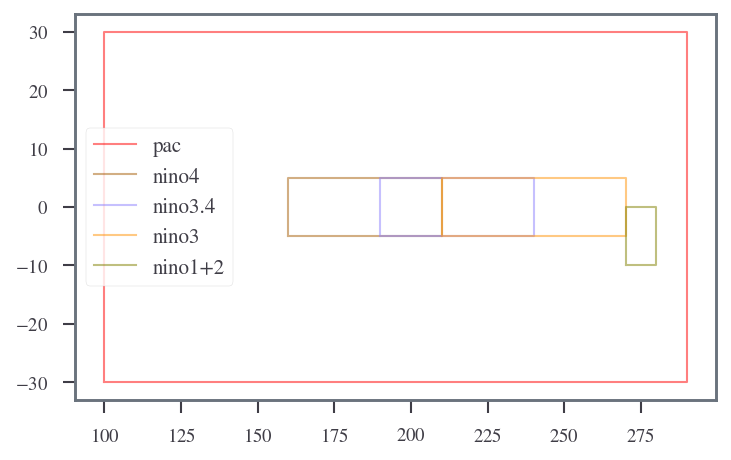

In [65]:
plot_nino()

## Introduction
https://ncar.github.io/PySpark4Climate/tutorials/Oceanic-Ni%C3%B1o-Index/

NOAA's operational definitions of El Niño and La Niña conditions are based upon the Oceanic Niño Index [ONI]. The ONI is defined as the 3-month running means of SST anomalies in the Niño 3.4 region [5N-5S, 120-170W].

The ONI is one measure of the El Niño-Southern Oscillation, and other indices can confirm whether features consistent with a coupled ocean-atmosphere phenomenon accompanied these periods.


In [7]:
import os
import numpy as np
import xarray as xr
import dask
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from src.xr_utils import sel, open_dataset
from src.constants import OCEAN_DATA_PATH, OCEAN_OUTPUT_PATH

In [8]:
from src.data_loading.download import get_noaa_data

get_noaa_data()

/home/users/sithom/seager19/src/data/NOAA_NCDC_ERSST_v3b_SST.nc already exists, not going to redownload.


In [71]:
from src.constants import NOAA_DATA_PATH
from src.xr_utils import sel, can_coords
from src.plot_utils import add_units, cmap

In [72]:
def load_noaa_data() -> xr.DataArray:
    noaa_da = add_units(can_coords(xr.open_dataarray(NOAA_DATA_PATH)))
    noaa_da.attrs["units"] = r"$^{\circ}$C"
    return noaa_da

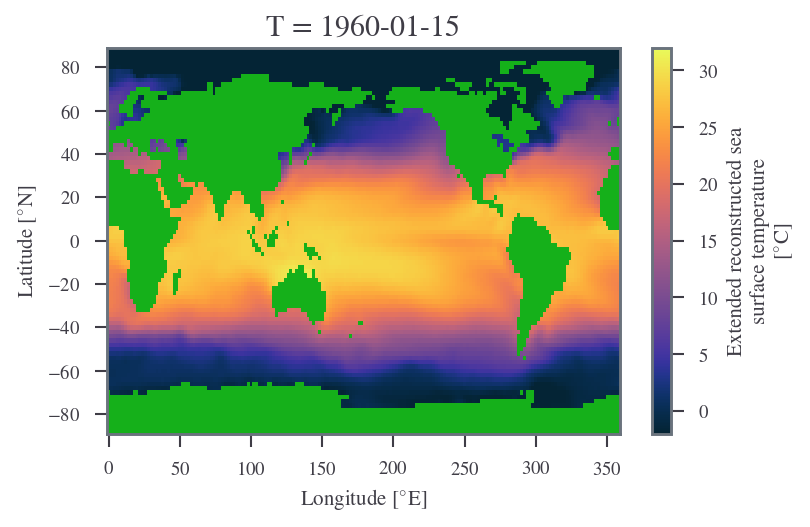

In [73]:
noaa_full = load_noaa_data()

noaa_full.isel(T=0).plot(cmap=cmap("sst"), vmin=-2, vmax=32)

In [26]:
len(noaa_full.coords["T"].values)

684

In [53]:
print(noaa_full.coords["T"].values[0])
print(noaa_full.coords["T"].values[-1])
# https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value
print((noaa_full.coords["T"].values[1]- noaa_full.coords["T"].values[0]).astype('timedelta64[D]'))

1960-01-15T00:00:00.000000000
2016-12-15T00:00:00.000000000
31 days


In [29]:
noaa_nino3_4_reg = sel(noaa_full, reg="nino3.4")

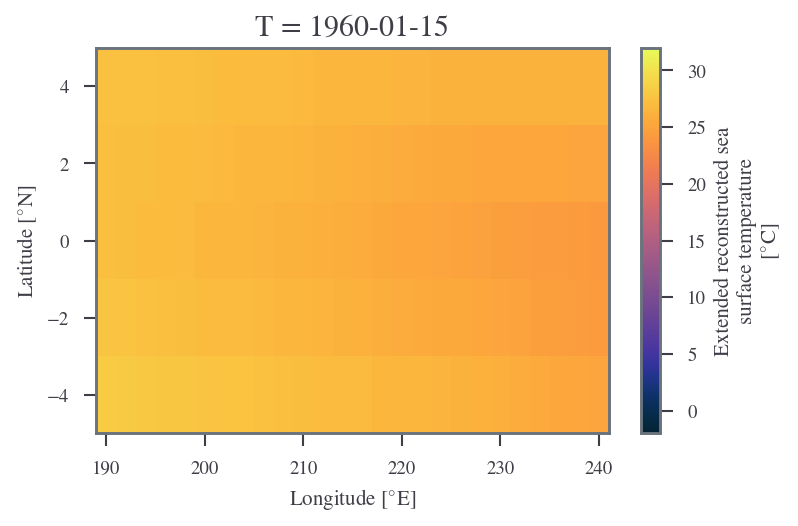

In [34]:
noaa_nino3_4_reg.isel(T=0).plot(cmap=cmap("sst"), vmin=-2, vmax=32)

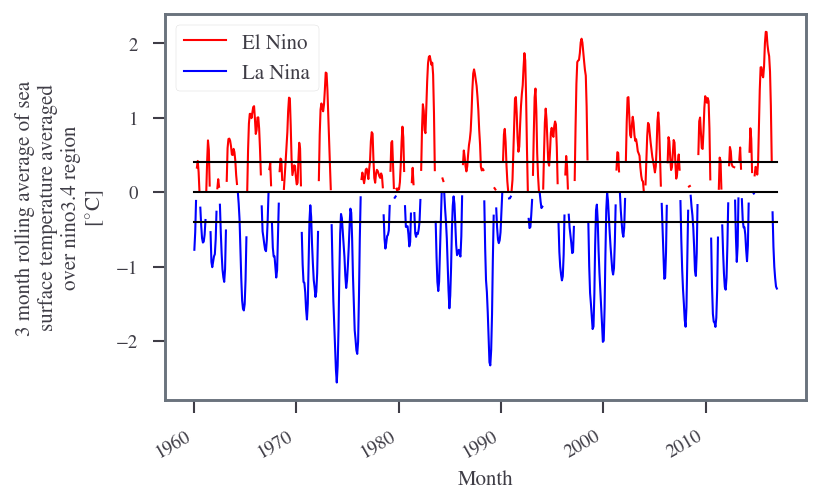

In [84]:
nino3_4_metric.where(nino3_4_metric>=0.4).plot(color="red", label="El Nino")
nino3_4_metric.where(nino3_4_metric<=0.4).plot(color="blue", label=r"La Nina")
dummy_line = nino3_4_metric.copy()
dummy_line[:] = 0
dummy_line.plot(color="black")
dummy_line[:] = 0.4
dummy_line.plot(color="black")
dummy_line[:] = -0.4
dummy_line.plot(color="black")
plt.legend()

In [90]:
from src.constants import NINO3_4_TEST_PATH

In [91]:
nino3_4_metric.to_netcdf(str(NINO3_4_TEST_PATH))

In [88]:
open_dataset(OCEAN_OUTPUT_PATH / "om_run2f.nc").SST_SST

<xarray.DataArray 'SST_SST' (T_03: 697, L_03: 1, Y_03: 161, X_03: 360)>
[40398120 values with dtype=float32]
Coordinates:
  * X_03     (X_03) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_03     (Y_03) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_03     (L_03) float32 1.0
  * T_03     (T_03) object 1957-12-30 10:59:51.650391 ... 2015-12-28 16:53:33...
Attributes:
    long_name:  SST

In [89]:
print(open_dataset(OCEAN_OUTPUT_PATH / "om_spin.nc"))

<xarray.Dataset>
Dimensions:       (GRID: 1, L_01: 1, L_02: 1, L_03: 1, T_01: 241, T_02: 241, T_03: 241, X_01: 161, X_02: 360, X_03: 360, Y_01: 360, Y_02: 161, Y_03: 161)
Coordinates: (12/13)
  * GRID          (GRID) float32 0.0
  * X_01          (X_01) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * Y_01          (Y_01) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * L_01          (L_01) float32 1.0
  * T_01          (T_01) object 1937-12-30 10:59:31.875000 ... 1957-12-28 16:...
  * X_02          (X_02) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    ...            ...
  * L_02          (L_02) float32 0.0
  * T_02          (T_02) object 1937-12-30 10:59:31.875000 ... 1957-12-28 16:...
  * X_03          (X_03) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_03          (Y_03) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_03          (L_03) float32 1.0
  * T_03          (T_03) object 1937-12-30 10:59:31.875000 ... 1957-12

In [91]:
open_dataset(OCEAN_OUTPUT_PATH / "om_run2f.nc").SST_SST

<xarray.DataArray 'SST_SST' (T_03: 697, L_03: 1, Y_03: 161, X_03: 360)>
[40398120 values with dtype=float32]
Coordinates:
  * X_03     (X_03) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Y_03     (Y_03) float32 -80.0 -79.0 -78.0 -77.0 ... 77.0 78.0 79.0 80.0
  * L_03     (L_03) float32 1.0
  * T_03     (T_03) object 1957-12-30 10:59:51.650391 ... 2015-12-28 16:53:33...
Attributes:
    long_name:  SST

## Compare different ninos

In [69]:
from src.metrics import nino_calculate

In [70]:
for reg in ["nino1+2", "nino3", "nino3.4", "nino4", "pac"]:
    metric, climatology = nino_calculate(noaa_full, reg=reg)
    metric.attrs["long_name"] = "3 month rolling average SST anomaly"
    metric.plot(label=metric.attrs["reg"])
    plt.legend()
    #print(reg, )

NameError: name 'noaa_full' is not defined

In [18]:
metric

<xarray.DataArray 'sst' (T: 684)>
array([-2.82265663e-01, -1.97355270e-01, -6.10891990e-02,  8.13528746e-02,
        8.75161514e-02,  2.19885521e-02, -1.35272980e-01, -1.91978455e-01,
       -2.46517822e-01, -2.24974319e-01, -2.56942123e-01, -2.76782990e-01,
       -2.36664459e-01, -1.47441864e-01, -1.30081177e-03,  7.43325576e-02,
        9.04254913e-02, -1.76277161e-02, -1.69327423e-01, -3.10485840e-01,
       -3.58098984e-01, -3.75059128e-01, -4.03191268e-01, -4.21957672e-01,
       -4.04160202e-01, -3.12211990e-01, -2.03395844e-01, -1.03411362e-01,
       -6.24949150e-02, -8.73832703e-02, -1.43710464e-01, -1.94041580e-01,
       -2.24223465e-01, -2.52489090e-01, -3.28693390e-01, -3.91384780e-01,
       -3.98534775e-01, -2.61179626e-01, -7.05788955e-02,  9.29133147e-02,
        1.25170395e-01,  6.29329681e-02, -2.52412166e-02, -4.49409485e-02,
       -4.81262207e-02, -2.37267818e-02, -6.52999878e-02, -1.10567734e-01,
       -1.82952881e-01, -2.02447891e-01, -1.63564056e-01, -1.27915069e-01,
       -1.24523163e-01, -1.76174805e-01, -2.83353180e-01, -3.60720962e-01,
       -3.99393737e-01, -4.10770416e-01, -4.95557159e-01, -5.76485336e-01,
       -5.59864044e-01, -4.33604568e-01, -2.42441177e-01, -7.90036544e-02,
        8.90477560e-03, -4.07816581e-02, -1.13838196e-01, -1.64288208e-01,
       -1.63787216e-01, -1.50176376e-01, -1.60561249e-01, -2.04169601e-01,
       -2.52628982e-01, -1.93823501e-01, -6.05290756e-02,  2.80927029e-02,
        9.90295410e-03, -7.06094131e-02, -1.56926483e-01, -2.18957275e-01,
...
       -1.16404854e-01, -1.44866943e-01, -2.05020905e-01, -2.83074707e-01,
       -2.83407867e-01, -1.88449860e-01,  4.00416087e-03,  1.79386139e-01,
        2.70706177e-01,  2.01371521e-01,  5.21170311e-02, -9.37169418e-02,
       -1.44111007e-01, -1.41295761e-01, -1.53243393e-01, -1.72547668e-01,
       -1.27707168e-01,  4.46891785e-03,  1.90095276e-01,  3.27623367e-01,
        3.60066116e-01,  2.83110321e-01,  1.27380371e-01,  5.32665253e-02,
        4.69741821e-02,  1.01352058e-01,  7.62430876e-02, -1.28320064e-02,
       -6.21795654e-02, -2.56525688e-02,  1.43927261e-01,  2.91238785e-01,
        3.45352173e-01,  2.76059479e-01,  1.67440414e-01,  1.20652519e-01,
        9.58932266e-02,  9.56134796e-02,  4.47235107e-02, -1.23634338e-02,
       -5.15855178e-02,  3.40372734e-02,  2.19802856e-01,  4.28108871e-01,
        5.35151839e-01,  5.07525802e-01,  4.11832184e-01,  3.44273269e-01,
        3.29783142e-01,  3.35697174e-01,  2.84478515e-01,  2.18288422e-01,
        1.80234283e-01,  2.64108032e-01,  4.56204742e-01,  6.47700667e-01,
        7.50356078e-01,  7.09217727e-01,  6.15572631e-01,  5.57757735e-01,
        5.63555419e-01,  6.17735565e-01,  6.08041167e-01,  5.84580123e-01,
        5.31923950e-01,  5.63275039e-01,  6.40003204e-01,  7.27488875e-01,
        7.44302750e-01,  6.56473160e-01,  5.02004623e-01,  3.81390274e-01,
        3.45212936e-01,  3.59710068e-01,  3.12082946e-01,  2.72651672e-01],
      dtype=float32)
Coordinates:
  * T        (T) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-11-15 2016-12-15
Attributes:
    long_name:        3 month rolling average SST anomaly
    units:            $^{\circ}$C
    reg:              pac
    rolling_average:  3 months
    mean_state:       26.015999

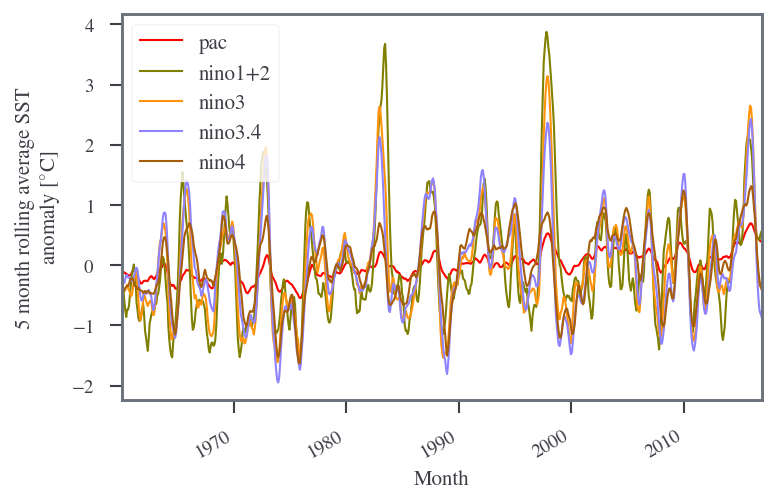

In [78]:
for reg in SEL_DICT:
    metric, mean_state = nino_calculate(noaa_full, reg=reg, roll_period=5)
    metric.attrs["long_name"] = "5 month rolling average SST anomaly"
    metric.plot(label=metric.attrs["reg"], color=SEL_DICT[reg]["color"])

plt.xlim(metric.coords["T"].values[0], metric.coords["T"].values[-1])
plt.legend()

In [80]:
from src.xr_utils import sel, get_trend

In [83]:
from src.plot_utils import cmap

run 1796169600000000000 slope <xarray.DataArray 'polyfit_coefficients' (Y: 89, X: 180)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [1.18156413e-21, 1.25681887e-21, 1.35992898e-21, ...,
        6.23262123e-22, 6.71071883e-22, 9.08942766e-22],
       [7.93634770e-22, 9.28893368e-22, 1.03298031e-21, ...,
        4.67128403e-22, 7.01836070e-22, 7.74778291e-22],
       [3.76669381e-22, 4.23983453e-22, 4.87517600e-22, ...,
        2.58891276e-22, 3.16170857e-22, 3.47830244e-22]])
Coordinates:
  * Y        (Y) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * X        (X) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0 rise = slope * run <

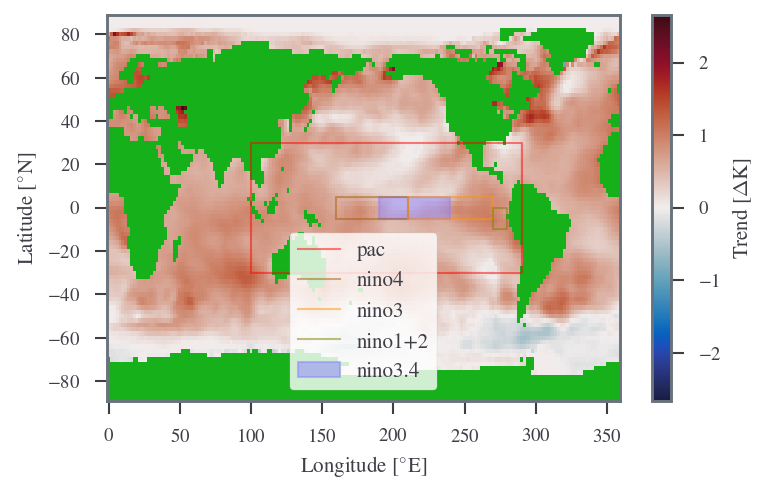

In [88]:
get_trend(noaa_full, min_clim_f=True, output="rise").plot(cmap=cmap("delta"), cbar_kwargs={"label": "Trend [$\Delta$K]"})
plot_nino()

## Compare with precip

In [21]:
# https://rabernat.github.io/research_computing_2018/assignment-8-xarray-for-enso.html

import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS')
             +pd.Timedelta(days=14))
dsp['T'] = true_time
dsp.load()

<xarray.Dataset>
Dimensions:  (T: 354, X: 144, Y: 72)
Coordinates:
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * T        (T) datetime64[ns] 1960-01-15 1960-02-15 ... 1989-05-15 1989-06-15
Data variables:
    prcp     (T, Y, X) float32 nan nan nan nan ... 0.06924 0.06633 0.06931 0.069
Attributes:
    Conventions:  IRIDL

In [52]:
time_coord = noaa_full.coords["T"].values
print(time_coord[0].__str__()[0:4] + " to "+ time_coord[-1].__str__()[0:4])

1960 to 2016


In [60]:
def mean_sst(sst_da: xr.DataArray) -> xr.DataArray:
    # Find mean temperature for each latitude
    mean_sst_lat = sst_da.mean(dim="X")

    # Find Weighted mean of those values
    # https://numpy.org/doc/stable/reference/generated/numpy.cos.html
    # https://numpy.org/doc/stable/reference/generated/numpy.radians.html
    num = (np.cos(np.radians(sst_da.Y)) * mean_sst_lat).sum(dim="Y")
    denom = np.sum(np.cos(np.radians(sst_da.Y)))

    # Find mean global temperature
        
    mean_temp = num / denom

    return mean_temp, np.cos(np.radians(sst_da.Y))

In [61]:
mean, cos = mean_sst(sel(noaa_full))

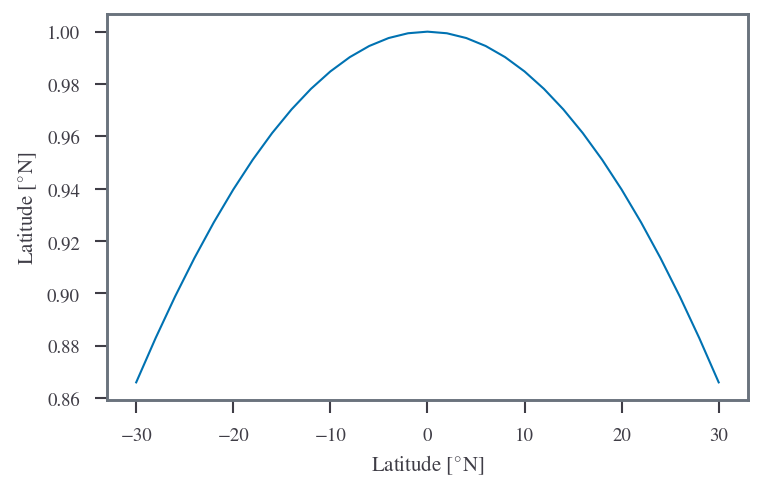

In [63]:
cos.plot()

## Now check ocean model output!!

In [14]:
sst_output_example = can_coords(open_dataset(OCEAN_OUTPUT_PATH / "om_run2f.nc").SST_SST)

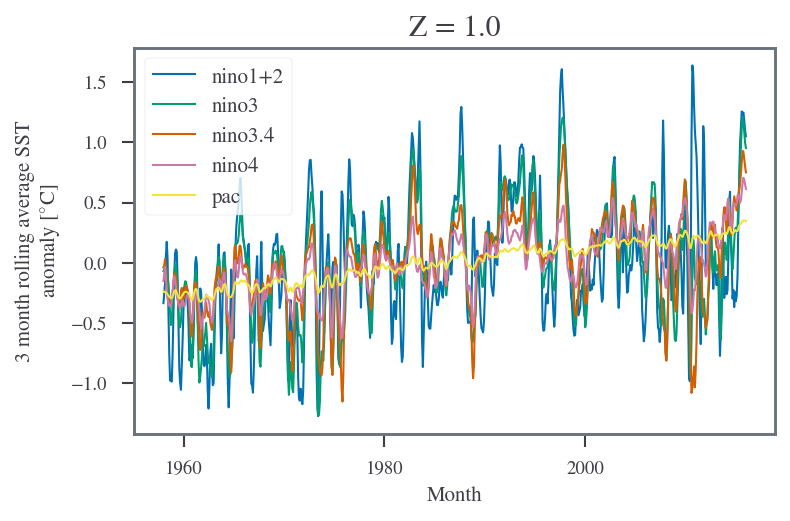

In [15]:
for reg in ["nino1+2", "nino3", "nino3.4", "nino4", "pac"]:
    metric, clim = nino_calculate(sst_output_example, reg=reg)
    metric.attrs["long_name"] = "3 month rolling average SST anomaly"
    metric.plot(label=metric.attrs["reg"])
    plt.legend()
    #print(reg, )

woo, it's pretty cool to see that trend come out; also, looks like there is some level of internal variablility 

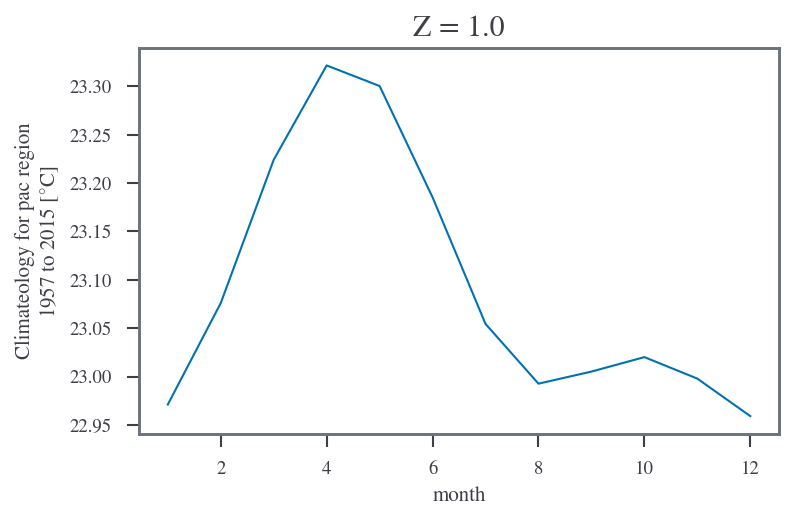

In [16]:
clim.plot()

In [17]:
metric, clim = nino_calculate(sst_output_example, reg="pac")

In [18]:
metric.polyfit("T", 1)

<xarray.Dataset>
Dimensions:               (Z: 1, degree: 2)
Coordinates:
  * degree                (degree) int64 1 0
  * Z                     (Z) float64 1.0
Data variables:
    polyfit_coefficients  (degree, Z) float64 3.13e-19 -0.1654

In [19]:
metric, clim = nino_calculate(sst_output_example, reg="nino3.4")

In [20]:
slope = metric.polyfit("T", 1).polyfit_coefficients.values[0]

In [21]:
run = int((metric.coords["T"][-1] - metric.coords["T"][0]).values)

In [22]:
rise = slope*run

In [23]:
print(run, slope, rise)

1803880421630859000 [3.10780288e-19] [0.56061048]


In [24]:
def get_trend(da):
    slope = da.polyfit("T", 1).polyfit_coefficients.values[0][0]
    run = int((da.coords["T"][-1] - da.coords["T"][0]).values) 
    rise = slope*run
    print(run, slope, rise)
    return rise

In [25]:
get_trend(metric)

1803880421630859000 3.107802875622609e-19 0.5606104761623708


0.5606104761623708

In [53]:
from src.xr_utils import get_trend

In [47]:
for reg in ["nino1+2", "nino3", "nino3.4", "nino4", "pac"]:
    metric, clim = nino_calculate(sst_output_example, reg=reg)
    get_trend(metric)

run 1803880421630859000 slope 3.5447610263384143e-19 rise=slope*run 0.6394325014771975
run 1803880421630859000 slope 3.3215169643815945e-19 rise=slope*run 0.5991619422162722
run 1803880421630859000 slope 3.107802875622609e-19 rise=slope*run 0.5606104761623708
run 1803880421630859000 slope 3.562982694981794e-19 rise=slope*run 0.6427194726087213
run 1803880421630859000 slope 3.1300333029805384e-19 rise=slope*run 0.5646205794299164


In [29]:
sel(sst_output_example)

<xarray.DataArray 'SST_SST' (T: 697, Z: 1, Y: 61, X: 191)>
[8120747 values with dtype=float32]
Coordinates:
  * X        (X) float32 100.0 101.0 102.0 103.0 ... 287.0 288.0 289.0 290.0
  * Y        (Y) float32 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * Z        (Z) float32 1.0
  * T        (T) object 1957-12-30 10:59:51.650391 ... 2015-12-28 16:53:33.28...
Attributes:
    long_name:  SST

In [37]:
sel(sst_output_example.polyfit("T", 1)).polyfit_coefficients.sel(degree=1).drop("degree")

<xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 61, X: 191)>
array([[[3.78856484e-19, 3.68495008e-19, 3.59923926e-19, ...,
         9.99854070e-19, 1.22108048e-18, 0.00000000e+00],
        [3.84078326e-19, 3.73188101e-19, 3.64328311e-19, ...,
         1.02447119e-18, 1.31977243e-18, 0.00000000e+00],
        [3.77919027e-19, 3.67858365e-19, 3.60067250e-19, ...,
         1.06838199e-18, 1.39100060e-18, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.65385167e-19, 4.62762316e-19, 4.62497248e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.43975244e-19, 4.41650606e-19, 4.41371239e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.22117620e-19, 4.19910626e-19, 4.19264395e-19]]])
Coordinates:
  * Z        (Z) float64 1.0
  * Y        (Y) float64 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * X        (X) float64 100.0 101.0 102.0 103.0 ... 287.0 288.0 289.0 290.0

In [40]:
def length_time(da): 
    return int((da.coords["T"][-1] - da.coords["T"][0]).values)

In [43]:
sst_trend = sel(sst_output_example.polyfit("T", 1)).polyfit_coefficients.sel(
    degree=1
).drop("degree") * length_time(sst_output_example)
sst_trend.attrs["units"] = "$^{\circ}$C"
sst_trend.attrs["long_name"] = "SST trend"

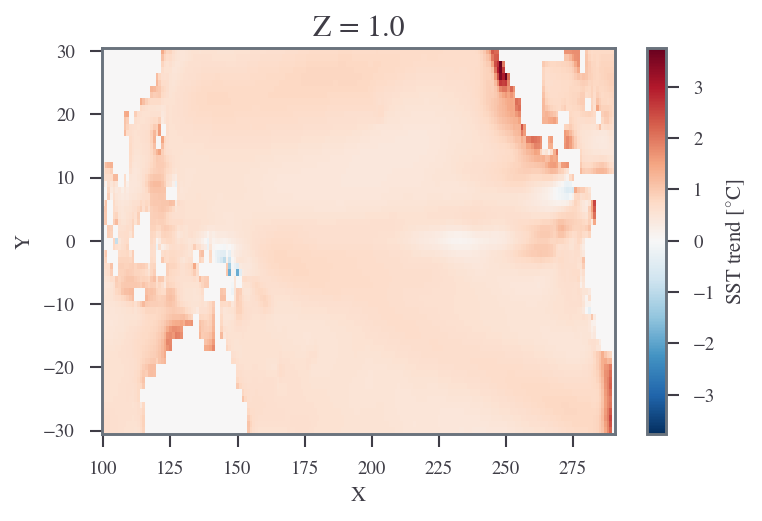

In [44]:
sst_trend.plot()

In [45]:
sst_output_example

<xarray.DataArray 'SST_SST' (T: 697, Z: 1, Y: 161, X: 360)>
[40398120 values with dtype=float32]
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * Z        (Z) float32 1.0
  * T        (T) object 1957-12-30 10:59:51.650391 ... 2015-12-28 16:53:33.28...
Attributes:
    long_name:  SST

run 1803880421630859000 slope <xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 161, X: 360)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [3.10913809e-19, 2.83618065e-19, 3.26167059e-19, ...,
         2.86958278e-19, 3.22435462e-19, 2.87754601e-19],
        [2.98549206e-19, 2.99713782e-19, 3.18523856e-19, ...,
         2.99460539e-19, 3.08200938e-19, 2.96985209e-19],
        [2.98665445e-19, 3.03861046e-19, 3.23045767e-19, ...,
         3.02599418e-19, 3.02627285e-19, 2.98933382e-19]]])
Coordinates:
  * Z        (Z) float64 1.0
  * Y        (Y) float64 -80.0 -79.0 -78.0 -77.0 -76.0 ... 77.0 78.0 79.0 80.0
  * X        (X) float64 0.0 1.0 2.0 3.0 4.0 ... 

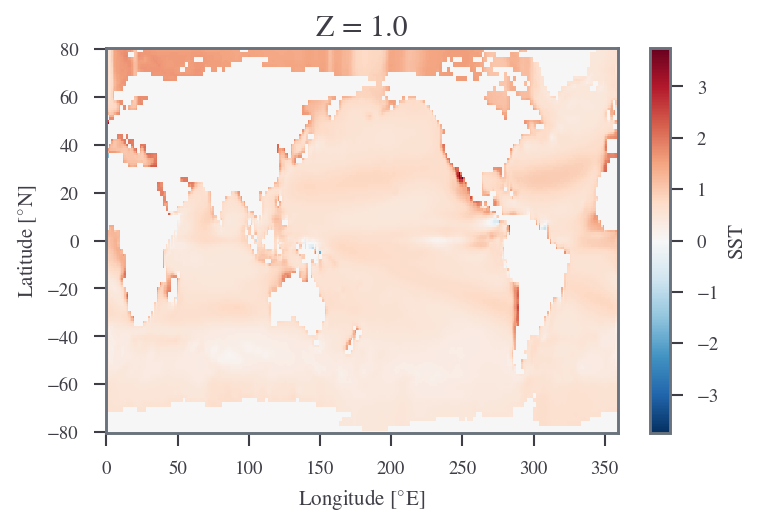

In [54]:
get_trend(sst_output_example).plot()

run 1803880421630859000 slope <xarray.DataArray 'polyfit_coefficients' (Z: 1, Y: 61, X: 191)>
array([[[3.78856484e-19, 3.68495008e-19, 3.59923926e-19, ...,
         9.99854070e-19, 1.22108048e-18, 0.00000000e+00],
        [3.84078326e-19, 3.73188101e-19, 3.64328311e-19, ...,
         1.02447119e-18, 1.31977243e-18, 0.00000000e+00],
        [3.77919027e-19, 3.67858365e-19, 3.60067250e-19, ...,
         1.06838199e-18, 1.39100060e-18, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.65385167e-19, 4.62762316e-19, 4.62497248e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.43975244e-19, 4.41650606e-19, 4.41371239e-19],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.22117620e-19, 4.19910626e-19, 4.19264395e-19]]])
Coordinates:
  * Z        (Z) float64 1.0
  * Y        (Y) float64 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * X        (X) float64 100.0 101.0 102.0 103.0 .

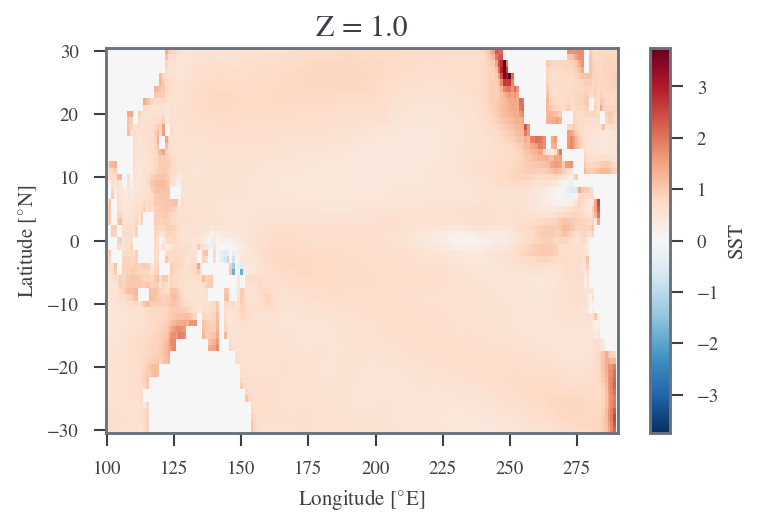

In [55]:
get_trend(sel(sst_output_example)).plot()